In [228]:
from __future__ import print_function
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

In [2]:
# Read file
df = pd.read_csv('data/jee2009.csv')

# print
df.head()

,REGST_NO,NAME,category,sub_category,GENDER,PIN_RES,PARENT_NAM,math,phys,chem,mark
0,2045263,VIBHU PAL,GE,NN,M,208011,SAROJ KUMAR PAL,30,33,26,89
1,2023172,NITESH BHARDWAJ,GE,NN,M,110046,OM PRAKASH BHARDWAJ,38,26,33,97
2,2040146,MANJEET,GE,NN,M,110085,DEVENDER SINGH,29,10,30,69
3,2032358,SHIKHAR DATTA,GE,NN,M,110075,SUNIL KUMAR DATTA,6,-8,12,10
4,2078152,RAJAT,GE,NN,M,121001,RAJESHWAR SINGH,11,-4,-9,-2


In [186]:
# Save each column as an np array
names = np.array(df['NAME'])
categories = np.array(df['category'])
genders = np.array(df['GENDER'])
math = np.array(df['math'])
phys = np.array(df['phys'])
chem = np.array(df['chem'])
marks = np.array(df['mark'])

In [187]:
# Sort according to mark -> math -> phy -> ratio of positive to negative marks
# acc. to https://www.quora.com/How-is-IIT-JEE-ranking-of-two-persons-with-same-marks-determined/answer/Priyanka-Kaul-9?srid=Xfgu
sortedArgs = np.lexsort((phys, math, marks))[::-1]
ranks = np.arange(len(marks))
names = names[sortedArgs]
categories = categories[sortedArgs]
genders = genders[sortedArgs]
math = math[sortedArgs]
phys = phys[sortedArgs]
chem = chem[sortedArgs]
marks = marks[sortedArgs]

In [223]:
# Correcting nans
genders[[145923, 160738, 175394, 177405, 201472, 288636]] = 'M'
genders[253705] = 'F'

In [81]:
sortedArgs[:10]

array([ 17452, 277823,  62466, 273409, 148016, 264496, 209965,  63640,
       259166, 206804])

In [82]:
marks

array([424, 417, 413, ..., -81, -85, -86])

In [52]:
# Check top 5 scores (all IIT Bombay)
df.loc[sortedArgs[:5]]

,REGST_NO,NAME,category,sub_category,GENDER,PIN_RES,PARENT_NAM,math,phys,chem,mark
17452,2076372,NITIN JAIN,GE,NN,M,121001,NEM CHAND JAIN,153,149,122,424
277823,1156155,SHUBHAM TULSIANI,GE,NN,M,342003,KISHAN LAL TULSIANI,149,148,120,417
62466,6004088,GOPI SIVAKANTH,ON,NN,M,533429,GOPI SRINIVAS,143,144,126,413
273409,1070200,SHAH PARARTH PARESH,GE,NN,M,400057,SHAH PARESH VIKRAM,136,156,117,409
148016,6128176,PRASHANT V,GE,NN,M,600004,VASUDEVAN R,141,151,115,407


In [53]:
# # Check mid-range people with equal scores
# df.loc[sortedArgs[1325:1335]]

In [101]:
# How many ranks to consider
n = 20000

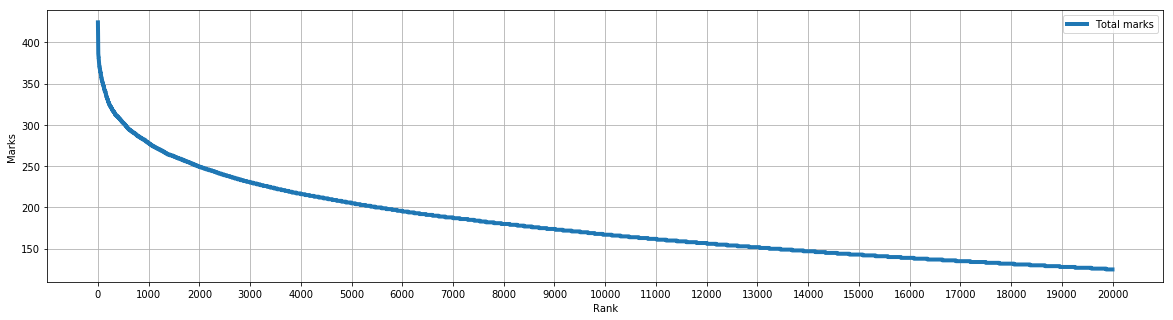

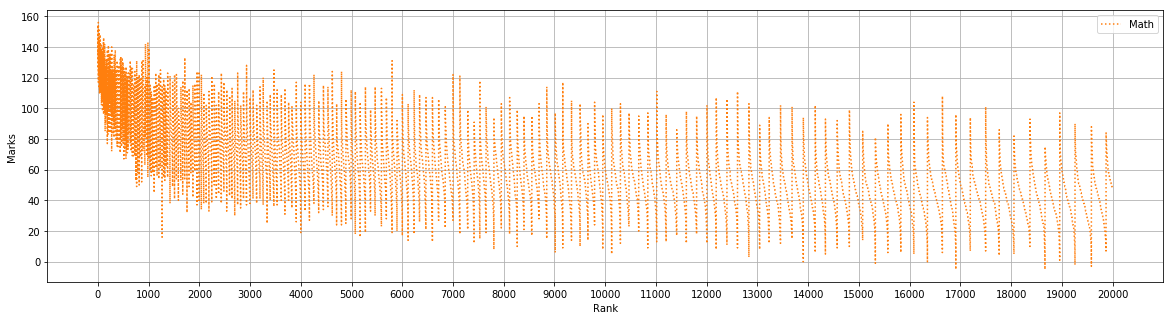

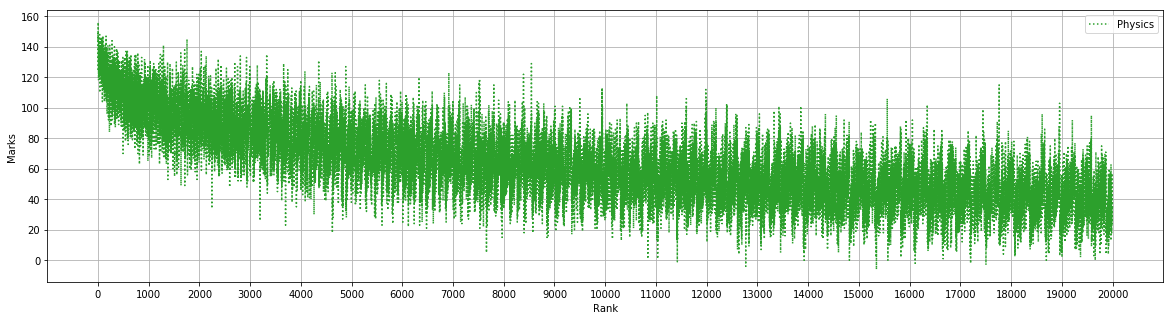

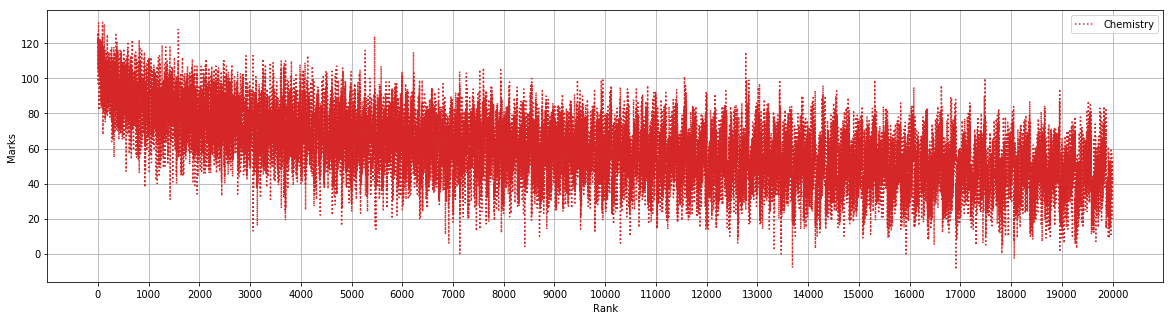

In [102]:
# Rank-wise marks
plt.figure(figsize=(20, 5))
plt.plot(marks[:n], linewidth=4, label='Total marks')
plt.xticks(np.arange(0, n+1, n//20))
plt.gca().grid(True)
plt.legend()
plt.xlabel("Rank")
plt.ylabel("Marks")
plt.figure(figsize=(20, 5))
plt.plot(math[:n], color='C1', linestyle=":", label='Math')
plt.xticks(np.arange(0, n+1, n//20))
plt.gca().grid(True)
plt.legend()
plt.xlabel("Rank")
plt.ylabel("Marks")
plt.figure(figsize=(20, 5))
plt.plot(phys[:n], color='C2', linestyle=":", label='Physics')
plt.xticks(np.arange(0, n+1, n//20))
plt.gca().grid(True)
plt.legend()
plt.xlabel("Rank")
plt.ylabel("Marks")
plt.figure(figsize=(20, 5))
plt.plot(chem[:n], color='C3', linestyle=":", label='Chemistry')
plt.xticks(np.arange(0, n+1, n//20))
plt.gca().grid(True)
plt.legend()
plt.xlabel("Rank")
plt.ylabel("Marks")
plt.show()

In [137]:
# The categories
np.unique(categories)

array(['GE', 'OB', 'OC', 'ON', 'SC', 'ST'], dtype=object)

GE 232334
    m 166715
    f 65619
OB 1
    m 0
    f 1
OC 15109
    m 10931
    f 4178
ON 88932
    m 70984
    f 17948
SC 36117
    m 28339
    f 7778
ST 12484
    m 9979
    f 2505
Marks Mean by category:  [ 35.07 -28.    13.16  24.08   9.58   6.66]
Marks Std by category:  [ 52.99   0.    39.04  43.99  31.62  28.49]


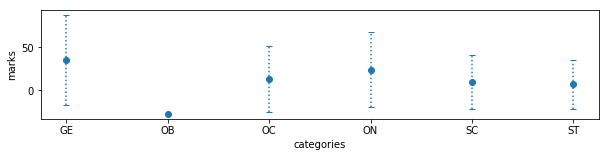

In [267]:
# Range of marks of each category
n = len(marks)
cats = np.unique(categories)
# Idx
cat_idx = {}
cat_m_idx = {}
cat_f_idx = {}
# Ranks
cat_ranks = {}
cat_m_ranks = {}
cat_f_ranks = {}
# Marks
cat_marks = {}
cat_m_marks = {}
cat_f_marks = {}
# Mean, Std
cat_marks_mean = []
cat_marks_std = []
cat_m_marks_mean = []
cat_m_marks_std = []
cat_f_marks_mean = []
cat_f_marks_std = []
# Means
cat_marks_means = {}
for cat in cats:
    # Idx
    cat_idx[cat] = np.where(categories[:n] == cat)
    cat_m_idx[cat] = np.where(genders[:n][cat_idx[cat]] == 'M')
    cat_f_idx[cat] = np.where(genders[:n][cat_idx[cat]] == 'F')
    print(cat, len(cat_idx[cat][0]))
    print("    m", len(cat_m_idx[cat][0]))
    print("    f", len(cat_f_idx[cat][0]))
    # Ranks
    cat_ranks[cat] = ranks[:n][cat_idx[cat]]
    cat_m_ranks[cat] = ranks[:n][cat_idx[cat]][cat_m_idx[cat]]
    cat_f_ranks[cat] = ranks[:n][cat_idx[cat]][cat_f_idx[cat]]
    # Marks
    cat_marks[cat] = marks[:n][cat_idx[cat]]
    cat_m_marks[cat] = marks[:n][cat_m_idx[cat]]
    cat_f_marks[cat] = marks[:n][cat_f_idx[cat]]
    # Mean, Std
    if len(cat_idx[cat][0]) > 0:
        cat_marks_mean.append(np.mean(cat_marks[cat]))
        cat_marks_std.append(np.std(cat_marks[cat]))
    else:
        cat_marks_mean.append(0)
        cat_marks_std.append(0)
    if len(cat_m_idx[cat][0]) > 0:
        cat_m_marks_mean.append(np.mean(cat_m_marks[cat]))
        cat_m_marks_std.append(np.std(cat_m_marks[cat]))
    else:
        cat_m_marks_mean.append(0)
        cat_m_marks_std.append(0)
    if len(cat_f_idx[cat][0]) > 0:
        cat_f_marks_mean.append(np.mean(cat_f_marks[cat]))
        cat_f_marks_std.append(np.std(cat_f_marks[cat]))
    else:
        cat_f_marks_mean.append(0)
        cat_f_marks_std.append(0)
# Category-wise marks
print('Marks Mean by category: ', np.round(np.array(cat_marks_mean)*100)/100)
print('Marks Std by category: ', np.round(np.array(cat_marks_std)*100)/100)
plt.figure(figsize=(10, 2))
eb1 = plt.errorbar(np.arange(len(cats)), cat_marks_mean, yerr=cat_marks_std, fmt='o', capsize=3)
eb1[-1][0].set_linestyle(':') 
plt.gca().set_xticklabels(np.append(0, cats))
plt.xlabel('categories')
plt.ylabel('marks')

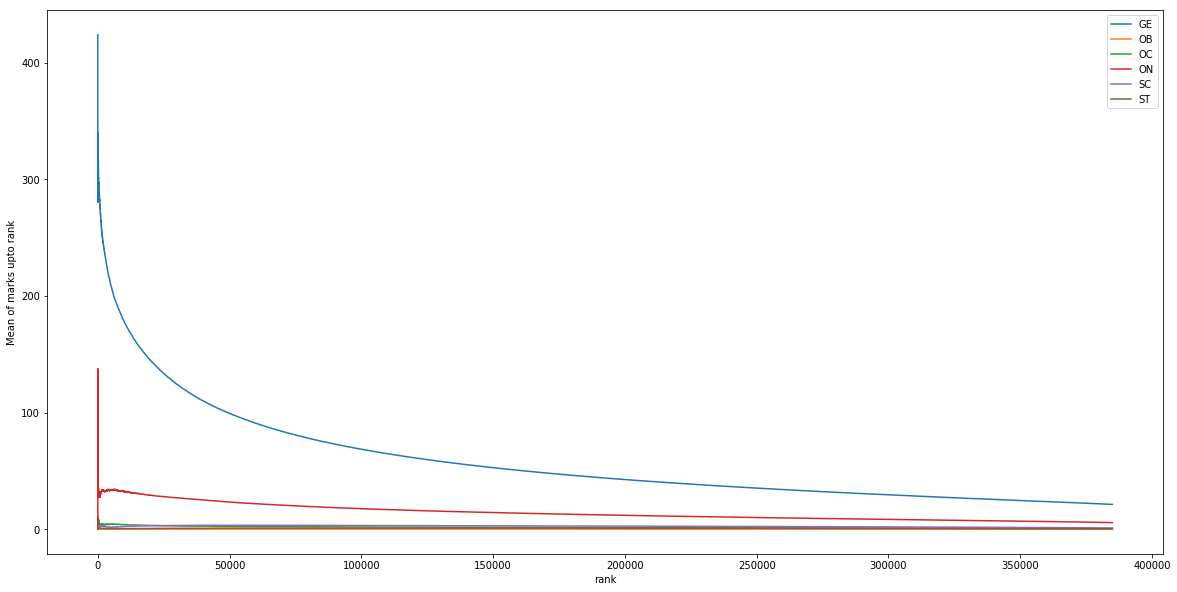

In [269]:
# Distribution of mean marks over rank
cat_marks_means = {}
for cat in cats:
    # Means
    cat_marks_means[cat] = np.zeros((n))
    cat_marks_means[cat][cat_idx[cat]] = cat_marks[cat]
    cat_marks_means[cat] = np.cumsum(cat_marks_means[cat])/(np.arange(n) + 1)
# Marks distribution
plt.figure(figsize=(20, 10))
for cat in cats:
    plt.plot(cat_marks_means[cat], label=cat)
plt.legend()
plt.xlabel('rank')
plt.ylabel('Mean of marks upto rank')

In [260]:
b = np.array([1, 3, 5])
c = np.array([10, 20, 30])
a = np.zeros((6))
a[b] = c
print(a)
np.cumsum(a)
np.cumsum(a)/(np.arange(6)+1)

[  0.  10.   0.  20.   0.  30.]


array([  0.        ,   5.        ,   3.33333333,   7.5       ,
         6.        ,  10.        ])

In [270]:
# # Junk
# a = np.arange(10)
# b = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3])
# c = np.array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1])
# d = np.where(b == 2)
# e = np.where(c[d] == 1)
# print(d)
# print(e)
# a[d][e]

In [145]:
cat_labels

['GE', 'OC', 'ON', 'SC', 'ST']

In [271]:
# np.concatenate(([1, 2], [3, 4], [5, 5]))

In [95]:
ge_idx

(array([     0,      1,      3, ..., 384973, 384974, 384975]),)

In [ ]:
# Scatter plot of non-General


In [8]:
# # Find people with equal mark math and phy scores
# for i in range(len(mark)):
#     if mark[sortedArgs[i]] == mark[sortedArgs[i+1]] and \
#             math[sortedArgs[i]] == math[sortedArgs[i+1]] and \
#             phys[sortedArgs[i]] == phys[sortedArgs[i+1]]:
#         print(df.loc[sortedArgs[i-1:i+2]])

In [4]:
# Try to find sorted order of students based on Atreya's rank - 2536, Vikram's rank - 1330

# Find df indixes
for i, name in enumerate(names):
    if 'ARAVIND B ATREYA' in name:
        print(i, name)
        atreyaDfIdx = i
    elif 'V S R VIKRAM' in name:
        print(i, name)
        vikramDfIdx = i

df.loc[[atreyaDfIdx, vikramDfIdx]]

68435 ARAVIND B ATREYA
71501 V S R VIKRAM


,REGST_NO,NAME,category,sub_category,GENDER,PIN_RES,PARENT_NAM,math,phys,chem,mark
68435,6017173,ARAVIND B ATREYA,GE,NN,M,500013,B K NAGARAJA RAO,100,67,72,239
71501,6024209,V S R VIKRAM,GE,NN,M,500028,V SITARAMAM,67,100,99,266


In [9]:
# Find Atreya's rank
atreyaSortedIdx = np.where(sortedArgs == atreyaDfIdx)[0][0]
print(atreyaSortedIdx)

2488


In [10]:
# Print around Atreya
df.loc[sortedArgs[atreyaSortedIdx-3:atreyaSortedIdx+3]]

,REGST_NO,NAME,category,sub_category,GENDER,PIN_RES,PARENT_NAM,math,phys,chem,mark
254015,1016111,MEET PRADHUMAN GANDHI,GE,NN,M,396445,PRADHUMAN RATNAVADAN GANDHI,104,84,51,239
315995,5072272,MAYANK RAJ,OC,NN,M,834001,BHOLA PRASAD AGRAWAL,102,71,66,239
257906,1001285,SINAI BORKAR BHUSHAN CHITRANJAN,GE,NN,M,403521,SINAI BORKAR PRABHAKAR,102,70,67,239
68435,6017173,ARAVIND B ATREYA,GE,NN,M,500013,B K NAGARAJA RAO,100,67,72,239
336882,5126232,ANIL KRISHNAN,GE,NN,M,700061,OLAT KRISHNAN,98,77,64,239
127160,6079128,ALLADA REVANTH KUMAR,ON,NN,M,530005,ALLADA SURYA RAO,97,64,78,239


In [11]:
# Find Vikram's ranks
vikramSortedIdx = np.where(sortedArgs == vikramDfIdx)[0][0]
print(vikramSortedIdx)

1343


In [12]:
# Print around Vikram
df.loc[sortedArgs[vikramSortedIdx-3:vikramSortedIdx+3]]

,REGST_NO,NAME,category,sub_category,GENDER,PIN_RES,PARENT_NAM,math,phys,chem,mark
210601,1127247,SHOBHIT MAHESHWARI,GE,NN,M,390002,UMESH KUMAR MAHE HWARI,78,104,84,266
209593,1121047,HARSHIT GANGWAR,ON,NN,M,243122,JWALA PRASAD GANGWAR,70,97,99,266
118532,6060126,POOJITHA REDDY MUDUPUNA VEMALA,GE,NN,F,517501,BHASKAR REDDY M,67,119,80,266
71501,6024209,V S R VIKRAM,GE,NN,M,500028,V SITARAMAM,67,100,99,266
274292,1076510,VAIBHAV SHRIDHAR PITTIE,GE,NN,M,400026,PITTIE SHRIDHAR NANDLAL,66,112,88,266
357905,4083016,VAIBHAVI GANGWAR,ON,NN,F,226016,ASHOK GANGWAR,64,98,104,266
